# EDA danych dotyczących Irysów

## Autor: Piotr Bednarski

## O danych

- ### Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

- ### Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

- ### Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

- ### Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('25__iris.csv', sep=",")
df.sample(5)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
48,5.3,3.7,1.5,0.2,Iris-setosa
133,6.3,2.8,5.1,1.5,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa
85,6.0,3.4,4.5,1.6,Iris-versicolor
84,5.4,3.0,4.5,1.5,Iris-versicolor


# EDA: Krok 1 - wstępny przegląd danych

### Zaczynamy od zmiany nazw kolumn, a także skrócenia nazw klas irysów, aby łatwiej nam było przeanalizować dane

In [37]:
df.rename(columns={'długość kielicha (sepal length)':'dług. kielicha','szerokość kielicha (sepal width)':'szer. kielicha','długość płatka (petal length)':'dług. płatka', 'szerokość płatka (petal width)':'szer. płatka', 'klasa (class)':'klasa'},inplace=True)

In [38]:
df['klasa'] = df['klasa'].str.split('-').str[1]

In [39]:
df.head(5)

,dług. kielicha,szer. kielicha,dług. płatka,szer. płatka,klasa
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Sprawdzamy 10 losowych rzędów

In [40]:
df.sample(10)

,dług. kielicha,szer. kielicha,dług. płatka,szer. płatka,klasa
79,5.7,2.6,3.5,1.0,versicolor
61,5.9,3.0,4.2,1.5,versicolor
25,5.0,3.0,1.6,0.2,setosa
128,6.4,2.8,5.6,2.1,virginica
71,6.1,2.8,4.0,1.3,versicolor
121,5.6,2.8,4.9,2.0,virginica
1,4.9,3.0,1.4,0.2,setosa
64,5.6,2.9,3.6,1.3,versicolor
3,4.6,3.1,1.5,0.2,setosa
127,6.1,3.0,4.9,1.8,virginica


### Sprawdzamy czy nie ma pozycji zdublowanych

In [41]:
df[df.duplicated()]

,dług. kielicha,szer. kielicha,dług. płatka,szer. płatka,klasa
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


### Po wykonaniu kodu widzimy, że mamy dokładnie 3 takie przypadki (2 dla klasy Setosa, 1 dla Virginica) - usuwamy z bazy

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
df.shape

(147, 5)

### Po usunięciu zduplikowanych danych mamy w sumie 147 rekordów, mamy także 5 kolumn.

### Sprawdzamy podstawowe statystyki opisowe 

In [44]:
df.describe()

,dług. kielicha,szer. kielicha,dług. płatka,szer. płatka
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Średnia, mediana i odchylenie standardowe wyglądają OK

In [45]:
df.nunique()

dług. kielicha    35
szer. kielicha    23
dług. płatka      43
szer. płatka      22
klasa              3
dtype: int64

## OBSERWACJE: 

### - Mamy 3 klasy kwiatów, przy czym dwa rekordy dla klasy Setosa i jeden dla Virginica były zdublowane, więc po usunięciu ze 150 pozostało nam 147 rekordów: 50 irysów Versicolor, 49 Virginica oraz 48 Setosa.
### Możemy dalej eksplorować te dane w kroku nr 2.

# EDA: Krok 2 - sprawdzenie czy są brakujące wartości

In [46]:
df.isnull().sum()

dług. kielicha    0
szer. kielicha    0
dług. płatka      0
szer. płatka      0
klasa             0
dtype: int64

### Wszystkie wartości w bazie danych są kompletne. 

### Możemy zatem przejść do kroku nr 3.

# EDA: Krok 3 - badanie pojedynczych zmiennych / kolumn

### Rysujemy wykresy w postaci histogramów, które pokażą nam wizualizację wartości dot. rozmiarów kielichów i płatków irysów

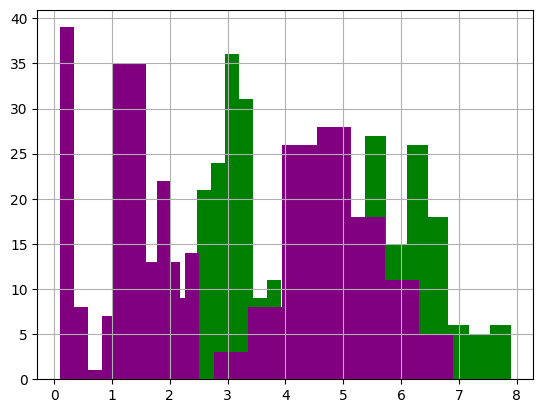

In [62]:
import matplotlib.pyplot as plt
import numpy as np

df['dług. kielicha'].hist(color='green');
df['szer. kielicha'].hist(color='green');
df['dług. płatka'].hist(color='purple');
df['szer. płatka'].hist(color='purple');

### Wizualizacja pokazuje nam, że poszczególne zmienne i dane wyglądają na poprawne.
#### - Rozmiary kielichów (kolor zielony) i płatków (kolor fioletowy) poszczególnych irysów mieszczą się w zakresie między wart. minimalną = 0,10 a wart. maksymalną = 7,9. 

#### Możemy przejść do kroku nr 4. 

# EDA: Krok 4 - transformacja danych / naprawa danych

### Zbudujemy dodatkowe dwie kolumny, które będą wyliczać rozmiar (długość + szerokość) kielicha i płatka dla każdego irysa

In [48]:
df['rozm. kielicha'] = df['dług. kielicha'] + df['szer. kielicha']
df['rozm. płatka'] = df['dług. płatka'] + df['szer. płatka']

In [49]:
df.head(5)

,dług. kielicha,szer. kielicha,dług. płatka,szer. płatka,klasa,rozm. kielicha,rozm. płatka
0,5.1,3.5,1.4,0.2,setosa,8.6,1.6
1,4.9,3.0,1.4,0.2,setosa,7.9,1.6
2,4.7,3.2,1.3,0.2,setosa,7.9,1.5
3,4.6,3.1,1.5,0.2,setosa,7.7,1.7
4,5.0,3.6,1.4,0.2,setosa,8.6,1.6


### Mamy dwie nowe kolumny, które przydadzą nam się w badaniu korelacji

# EDA: Krok 5 - badanie korelacji między danymi

### Rysujemy macierz korelacji, która pozwoli na sprawdzenie czy istnieją jakieś ciekawe powiązania

In [50]:
df.corr(numeric_only=True).round(2)

,dług. kielicha,szer. kielicha,dług. płatka,szer. płatka,rozm. kielicha,rozm. płatka
dług. kielicha,1.00,-0.11,0.87,0.82,0.87,0.86
szer. kielicha,-0.11,1.00,-0.42,-0.36,0.39,-0.40
dług. płatka,0.87,-0.42,1.00,0.96,0.60,1.00
szer. płatka,0.82,-0.36,0.96,1.00,0.58,0.98
rozm. kielicha,0.87,0.39,0.60,0.58,1.00,0.60
rozm. płatka,0.86,-0.40,1.00,0.98,0.60,1.00


## OBSERWACJE 
### - istnieje silna pozytywna korelacja (0.96) między długością płatka a jego szerokością, co jest zgodne z tym, jak wygląda taki płatek (wraz ze wzrostem długości rośnie proporcjonalnie szerokość i vice-versa). 
### - istnieje nieco mniejsza, ale nadal silna pozytywna korelacja (0.86-87) między długością kielicha a długością i szerokością (rozmiarem) płatka, co oznacza, że im większy płatek, tym zazwyczaj potrzebuje dłuższego kielicha jako wspornika/podporę. 

> ### To pokazuje nam, że Natura wie jak sama o siebie zadbać, a przynajmniej jeśli chodzi o irysy :)

### - mamy średnią korelację między rozmiarem płatka a kielicha (0.60). 

> ### Ma to sens, gdyż im większy płatek, tym ma dłuższy niż szerszy kielich, i to też widzimy w korelacji między rozm. płatka a dług. kielicha (0.86), która jest dwa razy silniejsza niż korelacja między rozm. płatka a szer. kielicha (-0.40)

### Spróbujemy jeszcze zbadać różnice między poszczególnymi rozmiarami płatków i kielichów dla trzech klas irysów

In [51]:
sumr_k_se = df.loc[df['klasa']=='setosa']['rozm. kielicha'].mean()
sumr_p_se = df.loc[df['klasa']=='setosa']['rozm. płatka'].mean()
sumr_k_vi = df.loc[df['klasa']=='virginica']['rozm. kielicha'].mean()
sumr_p_vi = df.loc[df['klasa']=='virginica']['rozm. płatka'].mean()
sumr_k_ve = df.loc[df['klasa']=='versicolor']['rozm. kielicha'].mean()
sumr_p_ve = df.loc[df['klasa']=='versicolor']['rozm. płatka'].mean()

In [52]:
df2 = pd.DataFrame({
    'setosa':[sumr_k_se,sumr_p_se],
    'virginica':[sumr_k_vi,sumr_p_vi],   
    'versicolor':[sumr_k_ve,sumr_p_ve]},
    index=['suma rozm. kiel. [cm]','suma rozm. płat. [cm]'])


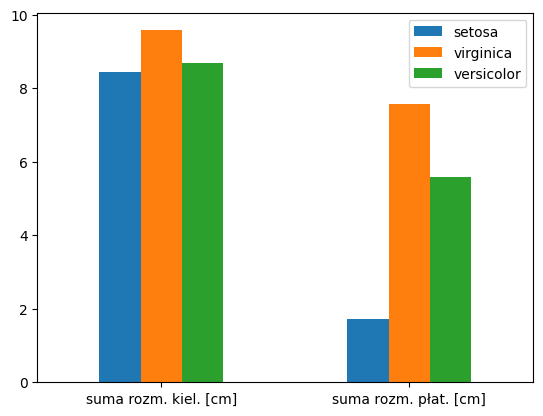

In [58]:
df2.plot(kind='bar', rot=0);

#### - największe wg średniej statystycznej kielichy i płatki mają irysy virginica 
#### - trochę mniejsze statystycznie od irysów virginica kielichy i płatki mają irysy versicolor
#### - największa średnia dysproporcja między rozmiarem kielichów i płatków występuje u irysów setosa (duże kielichy a stosunkowo małe płatki)

# EDA: Krok 6 - badanie wartości odstających

### Rysujemy 2 wykresy: punktowy (scatteplot) oraz pudełkowy (boxplot), aby sprawdzić czy w danych nie ma żadnych niepokojących anomalii.

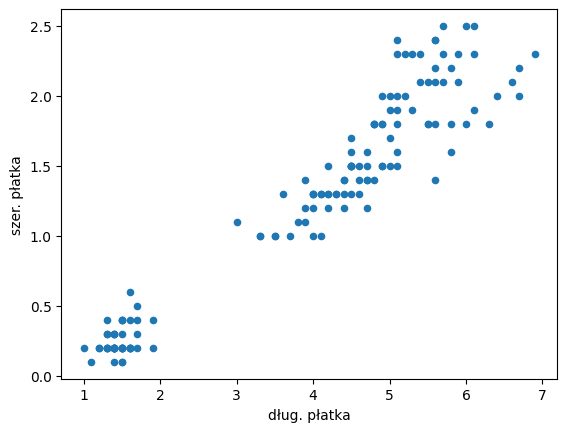

In [54]:
df.plot(kind='scatter',x='dług. płatka', y='szer. płatka');

### - widzimy, że w naszych danych nie ma płatków o szerokościach w zakresie pomiędzy ok. 0,6 cm a 1 cm.  

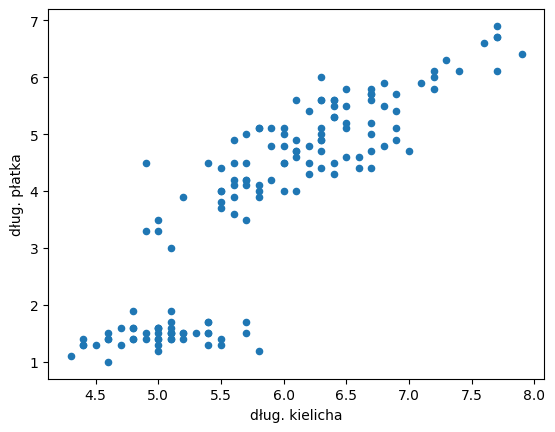

In [55]:
df.plot(kind='scatter',x='dług. kielicha', y='dług. płatka');

 ### - nie ma też płatków o długościach w zakresie pomiędzy ok. 2 a 3 cm

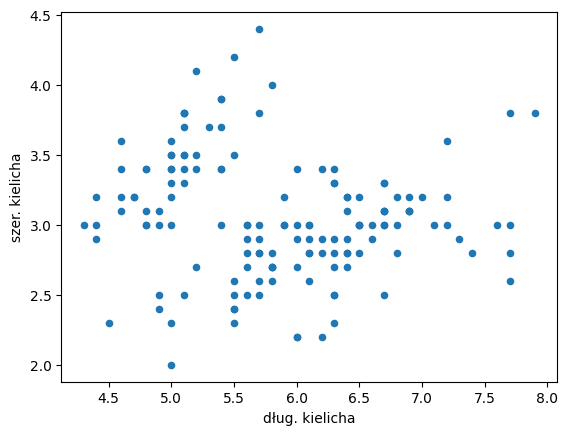

In [56]:
df.plot(kind='scatter',x='dług. kielicha', y='szer. kielicha');

### - kielichy irysów potrafią być nawet do 2 razy dłuższe od ich szerokości   

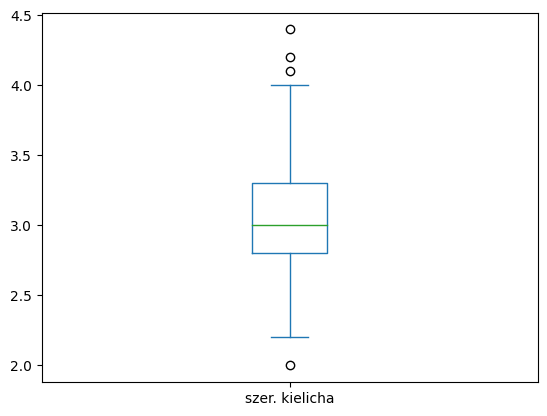

In [57]:
df['szer. kielicha'].plot(kind='box');

### - dla szerokości kielicha mamy dokładnie 4 wartości odstające (jedna dla wartości ok. 2 cm, a pozostałe trzy między 4 a 4,5 cm)

# <span style='color:green '> WNIOSKI KOŃCOWE </span>

### 1. największe wg średniej statystycznej kielichy i płatki mają irysy virginica
### 2. trochę mniejsze statystycznie od irysów virginica kielichy i płatki mają irysy versicolor
### 3. największa dysproporcja między rozmiarem kielichów i płatków występuje u irysów setosa (duże kielichy a stosunkowo małe płatki
### 4. im dłuższy płatek irysa virginica czy versicolor, tym potrzebuje dłuższego kielicha jako wspornika/podporę (wyjątkiem są irysy setosa)
### 5. kielichy badanych irysów potrafią być nawet do 2 razy dłuższe od ich szerokości

## <span style='color:green '> OBSERWACJE DOTYCZĄCE DANYCH (1/2) </span>

### 1. brak danych dotyczących długości płatków w zakresie ok. (2 cm, 3 cm) oraz szerokości płatków w zakresie ok. (0,6 cm, 1 cm) może sugerować dwa scenariusze:
> ### a. takie rozmiary irysów nie występują w danych, gdyż nie było akurat takich irysów z takimi rozmiarami płatków zarejestrowanych do tej bazy danych
> ### b. takie rozmiary irysów nie występują w danych, gdyż jakieś irysy zostały pominięte, przez co dostarczone dane są niepełne, wówczas można naprawić ten brak poprzez wypełnienie danych w sposób proporcjonalny do korelacji między wartościami (długość i szerokość płatków)

## <span style='color:green '> OBSERWACJE DOTYCZĄCE DANYCH (2/2) </span>

### 2. dla szerokości kielicha mamy dokładnie 4 wartości odstające (jedna dla wartości ok. 2 cm, a pozostałe trzy między 4 a 4,5 cm), co może sugerować dwa scenariusze:
> ### a. skrajnie niska oraz skrajnie wysoka szerokość kielicha jest uzasadniona i może wystąpić w naturze
> ### b. są to złe pomiary, ale jest ich na tyle mało (4 wobec pozostałych 143 pomiarów), że nie wpływają na ogólną analizę i wyciągnięte wnioski, dlatego nie zostały usunięte z danych z uwagi na możliwy scenariusz 'a' powyżej

In [1]:
!jupyter nbconvert irysy_eda_PIOTR_raport.ipynb --to html --no-input --no-prompt --output irysy_raport_PIOTR.html

[NbConvertApp] Converting notebook irysy_eda_PIOTR_raport.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 430364 bytes to irysy_raport_PIOTR.html
